<a href="https://colab.research.google.com/github/LeDuyThanhUTE/BT/blob/main/Nhan_dien_do_an.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#khai bao
from sklearn.model_selection import train_test_split
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/BT/Food/

/content/drive/MyDrive/Colab Notebooks/BT/Food


In [ ]:
train_data = ImageDataGenerator(rescale = 1./255, shear_range = 0.2 , zoom_range = 0.2, horizontal_flip = True) 

In [ ]:
train = train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BT/Food/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 180 images belonging to 4 classes.


In [ ]:
test = train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BT/Food/Test',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 60 images belonging to 4 classes.


In [ ]:
train.class_indices

{'Banh Xeo': 0, 'Ca Kho': 1, 'Com Tam': 2, 'Pia': 3}

In [ ]:
test.class_indices

{'Banh Xeo': 0, 'Ca Kho': 1, 'Com Tam': 2, 'Pia': 3}

In [ ]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))

model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train,epochs=20,batch_size=128,verbose=1, validation_data=test, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/20
6/6 [==============================] - 76s 11s/step - loss: 73.8057 - accuracy: 0.2611 - val_loss: 1.5504 - val_accuracy: 0.2333
Epoch 2/20
6/6 [==============================] - 6s 1s/step - loss: 1.4511 - accuracy: 0.2444 - val_loss: 1.3755 - val_accuracy: 0.2500
Epoch 3/20
6/6 [==============================] - 6s 1s/step - loss: 1.3716 - accuracy: 0.2944 - val_loss: 1.3434 - val_accuracy: 0.4000
Epoch 4/20
6/6 [==============================] - 6s 1s/step - loss: 1.3575 - accuracy: 0.3611 - val_loss: 1.3459 - val_accuracy: 0.2833
Epoch 5/20
6/6 [==============================] - 6s 1s/step - loss: 1.6515 - accuracy: 0.2833 - val_loss: 1.3440 - val_accuracy: 0.5000
Epoch 6/20
6/6 [==============================] - 6s 1s/step - loss: 1.3858 - accuracy: 0.4556 - val_loss: 1.2142 - val_accuracy: 0.4167
Epoch 7/20
6/6 [==============================] - 6s 1s/step - loss: 2.1984 - accuracy: 0.3333 - val_loss: 1.3259 - val_accuracy: 0.3333
Epoch 8/20
6/6 [======================

In [ ]:
model.save("Nhan_dien_do_an.h5")

In [ ]:
model_CNN=load_model('Nhan_dien_do_an.h5')

1/1 [==============================] - 0s 19ms/step
Cá Kho Tộ


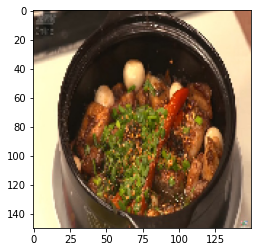

1/1 [==============================] - 0s 17ms/step
Cơm Tấm


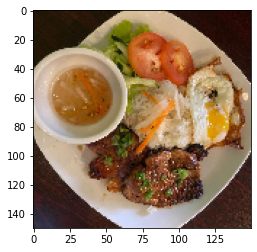

1/1 [==============================] - 0s 16ms/step
Bánh xèo


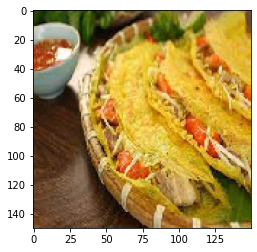

1/1 [==============================] - 0s 16ms/step
Bánh xèo


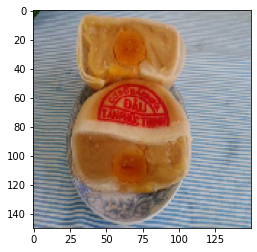

In [ ]:
test="/content/drive/MyDrive/Colab Notebooks/BT/Food/Attempt"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='Bánh xèo'
  if round(result[0][1])==1:
    prediction='Cá Kho Tộ'
  if round(result[0][2])==1:
    prediction='Cơm Tấm'
  if round(result[0][3])==1:
    prediction='Bánh Pía'
  print(prediction)
  plt.show()